In [3]:
!pip install colour-science
!pip install opencv-python

In [4]:
#Подключим необходимые библиотеки:
import cv2
import colour
import random
import imageio
import colorsys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.image as mpimg
from math import fabs
from colour.plotting import *
from collections import deque
from PIL import Image, ImageDraw 
from IPython.display import Image as Disp

### Исходное изображение:

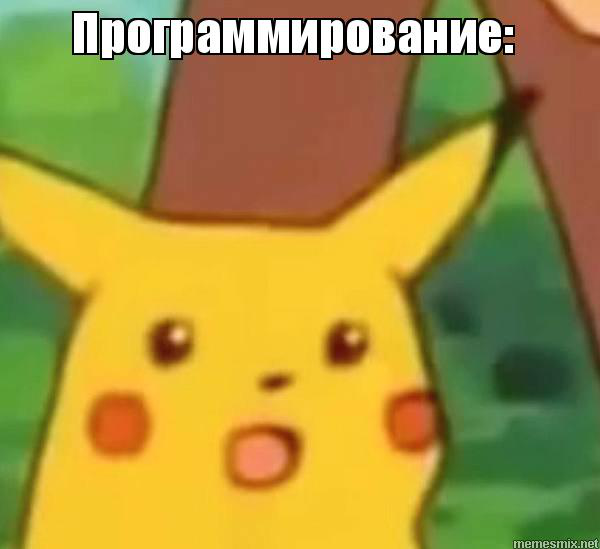

In [5]:
srcImg = 'temp.jpg'
img = Image.open(srcImg) 
img

In [6]:
def getGChannel(imageName, outName):
    image = cv2.imread(imageName)
    g = image.copy()
    g[:, :, 0] = 0
    g[:, :, 2] = 0
    cv2.imwrite(outName, g)
    return Image.open(outName)

def getRChannel(imageName, outName):
    image = cv2.imread(imageName)
    r = image.copy()
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    cv2.imwrite(outName, r)
    return Image.open(outName)

def getBChannel(imageName, outName):
    image = cv2.imread(imageName)
    b = image.copy()
    b[:, :, 1] = 0
    b[:, :, 2] = 0
    cv2.imwrite(outName, b)
    return Image.open(outName)  

### Поканальное отображение:

#### Красный канал:

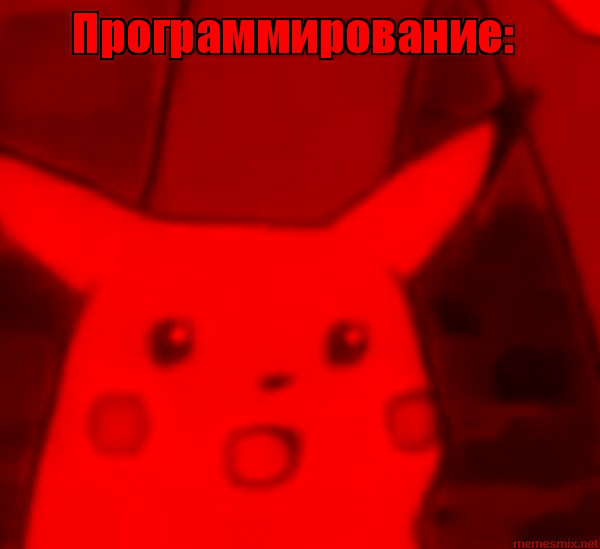

In [7]:
getRChannel(srcImg,'red-channeel.jpg')

#### Зелёный канал:

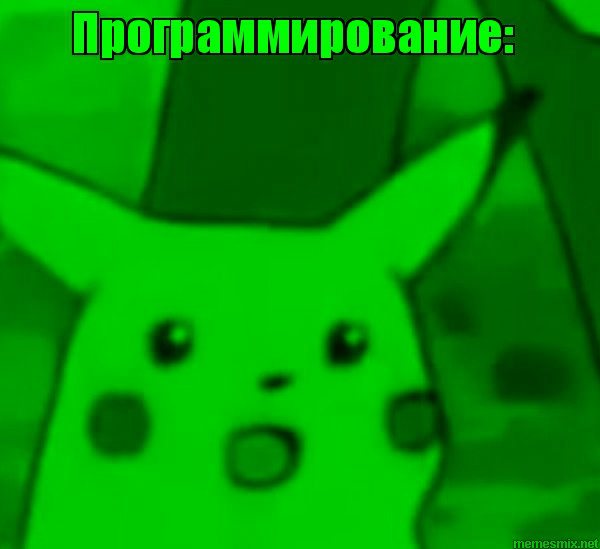

In [8]:
getGChannel(srcImg,'green-channeel.jpg')

#### Синий канал:

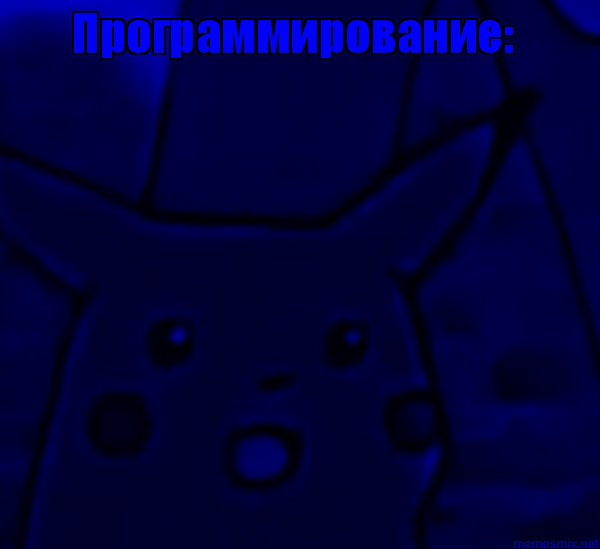

In [9]:
getBChannel(srcImg,'blue-channeel.jpg')

### В оттенках серого:

In [10]:
def toGray(source):
    pix = source.load() 
    new_img = Image.new('L', ( source.width, source.height ))
    draw = ImageDraw.Draw(new_img) 
    
    for i in range(source.width):
        for j in range(source.height):
            r = pix[i, j][0]
            g = pix[i, j][1]
            b = pix[i, j][2]
            s = round(0.2126 * r) + round(0.7152 * g) + round(0.0722 * b)
            draw.point((i, j), s)
            
    return new_img  

#### Красный канал:

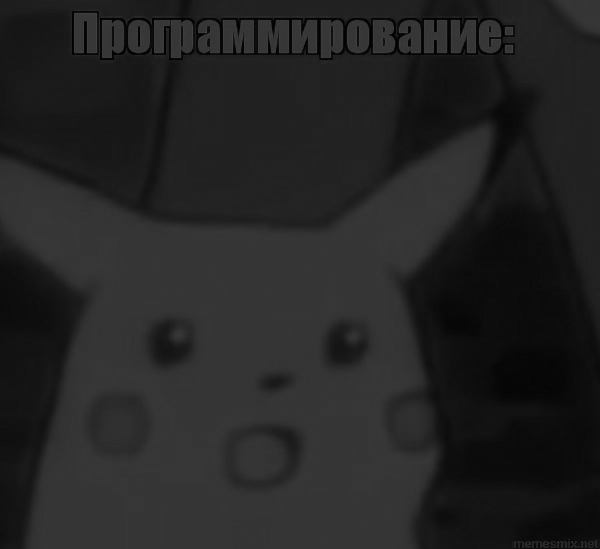

In [11]:
image_gray = toGray(getRChannel(srcImg,'red-channeel.jpg'))
image_gray.save('red-channeel-in-grey.jpg')
image_gray

#### Зелёный канал:

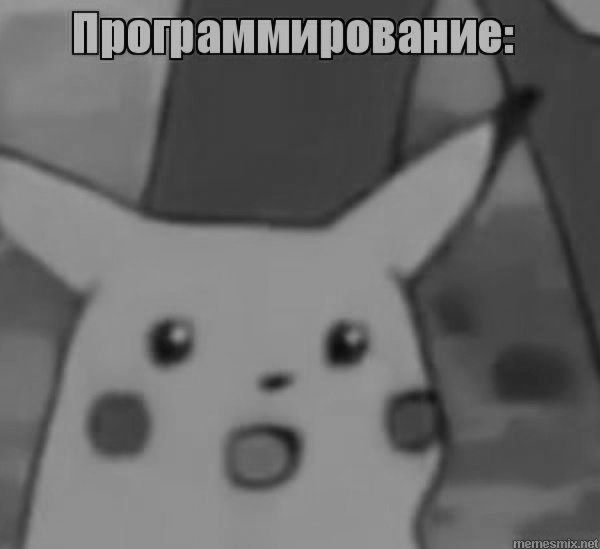

In [12]:
image_gray = toGray(getGChannel(srcImg,'green-channeel.jpg'))
image_gray.save('green-channeel-in-grey.jpg')
image_gray

#### Синий канал:

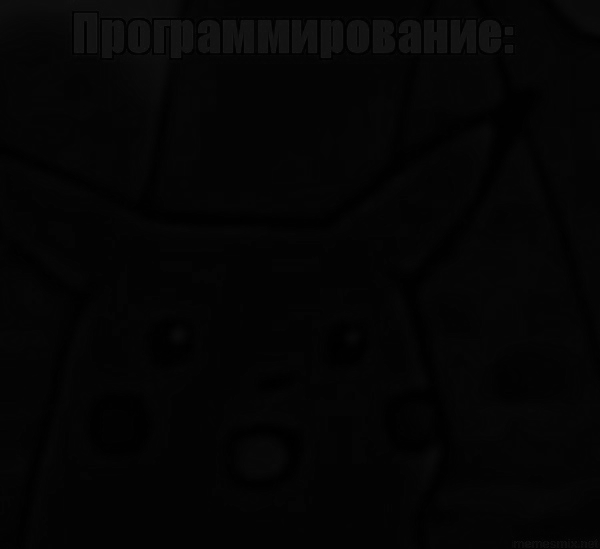

In [13]:
image_gray = toGray(getBChannel(srcImg,'blue-channeel.jpg'))
image_gray.save('blue-channeel-in-grey.jpg')
image_gray

### Лианеризовать изображение обратным гамма преобразованием:

In [14]:
def gamma_processing(imageName, outName, gamma):
    pic = imageio.imread(imageName)
    gamma_correction = ((pic/255) ** (gamma))
    mpimg.imsave(outName, gamma_correction)

    out_img = Image.open(outName) 
    drawg = ImageDraw.Draw(out_img) 
    for i in range(out_img.width):
        for j in range(out_img.height):
            r = int(255 * gamma_correction[j][i][0])
            g = int(255 * gamma_correction[j][i][1])
            b = int(255 * gamma_correction[j][i][2])
            drawg.point((i, j), (r, g, b))

    out_img.save(outName, "JPEG")
    return out_img

#### Обратная гамма коррекция

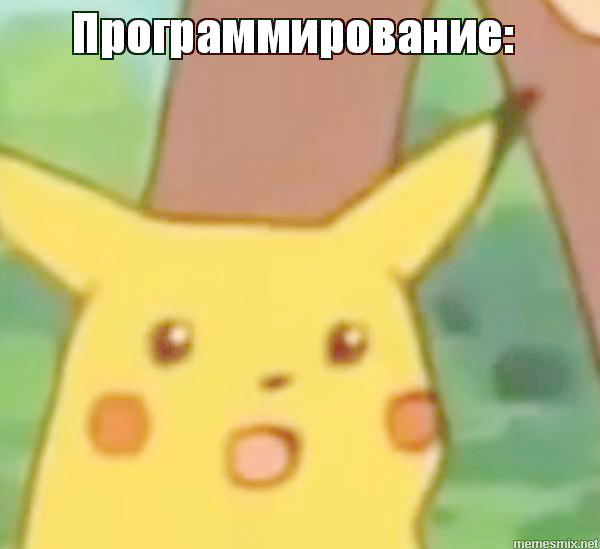

In [15]:
source = Image.open(srcImg)
gamma_file_name='gamma.jpg'
reverse_gamma = gamma_processing(srcImg, gamma_file_name, 1/2)
reverse_gamma

#### Красный канал после г.к.

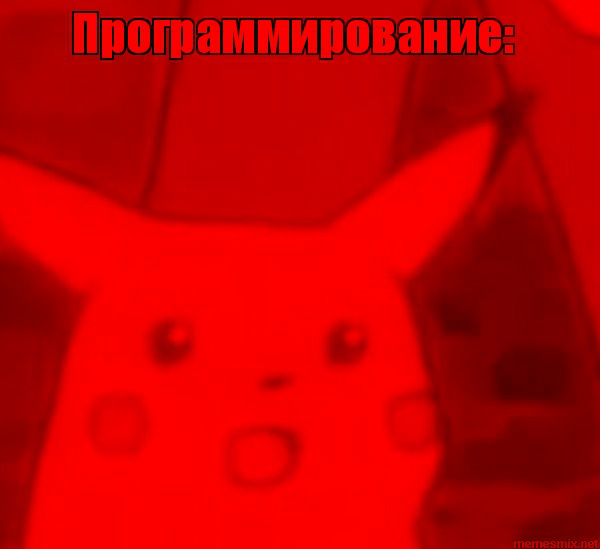

In [16]:
r_gamma = getRChannel(gamma_file_name,'red-gamma.jpg')
r_gamma

#### Зеленый канал после г.к.

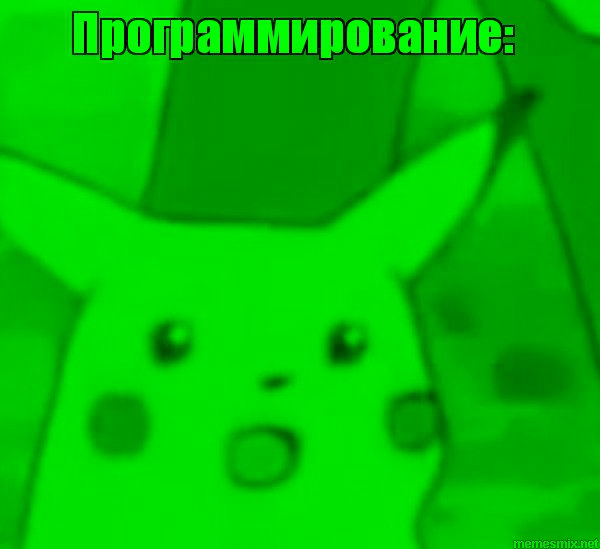

In [17]:
g_gamma = getGChannel(gamma_file_name,'green-gamma.jpg')
g_gamma

#### Синий канал после г.к.

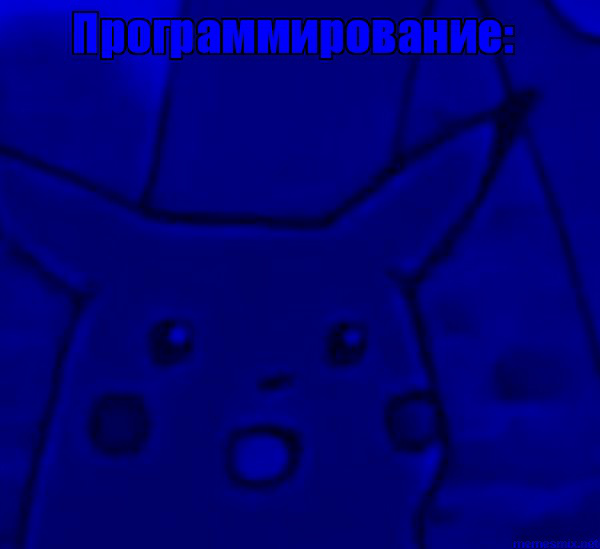

In [20]:
b_gamma = getBChannel(gamma_file_name,'blue-gamma.jpg')
b_gamma

#### Отобразить поканально разницу между исходным изображением и линеаризованным зображениями:

In [25]:
def diff(image1, image2):
    new_img = Image.new('RGB', ( image1.width, image1.height ))
    pix1 = image1.load()
    pix2 = image2.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image1.width):
        for j in range(image1.height):
            r = round(fabs(pix1[i, j][0] - pix2[i, j][0]))
            g = round(fabs(pix1[i, j][1] - pix2[i, j][1]))
            b = round(fabs(pix1[i, j][2] - pix2[i, j][2]))
            draw.point((i, j), (r, g, b))
    return new_img

#### Красный

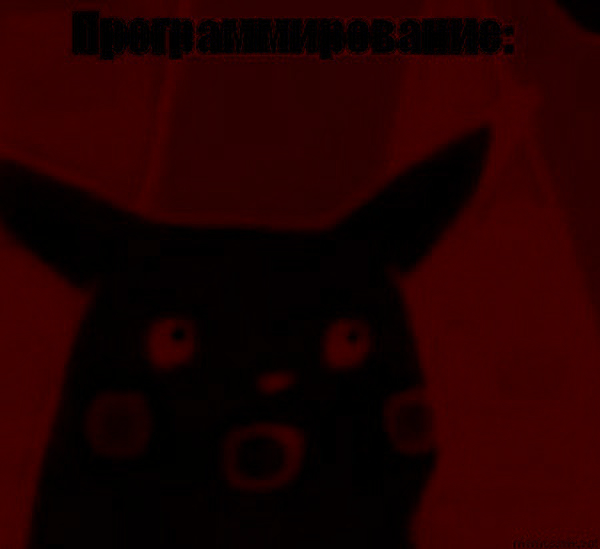

In [26]:
source = Image.open('red-channeel.jpg') 
r_diff = diff(source, r_gamma)
r_diff.save('red-gamma-different.jpg')
r_diff

#### Зелёный

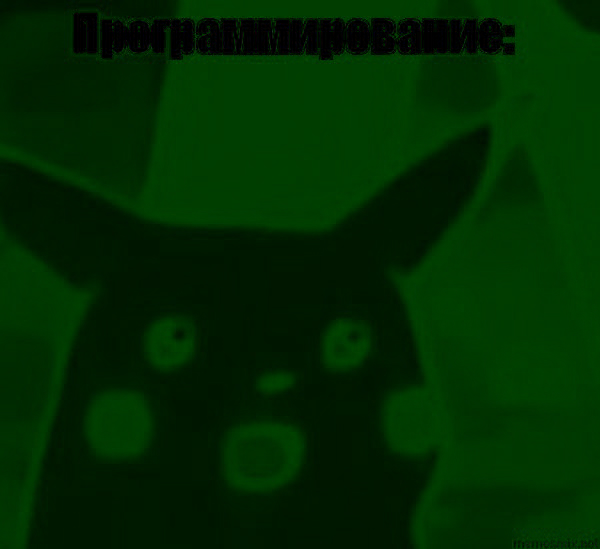

In [28]:
source = Image.open('green-channeel.jpg') 
g_diff = diff(source, g_gamma)
g_diff.save('green-gamma-diff.jpg')
g_diff

#### Синий

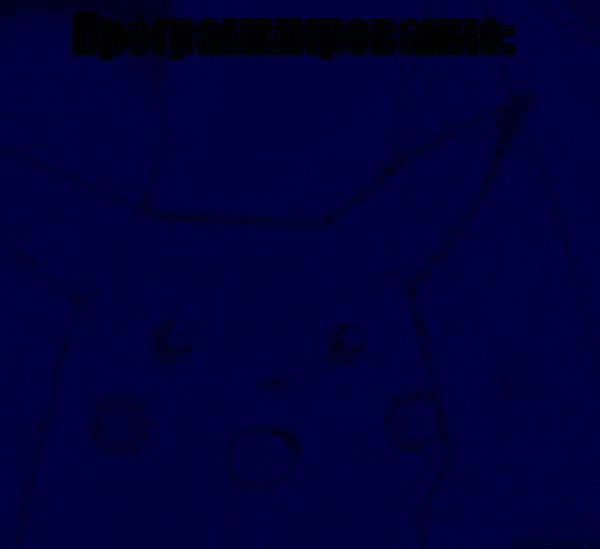

In [29]:
source = Image.open('blue-channeel.jpg') 
b_diff = diff(source, b_gamma)
b_diff.save('blue-gamma-diff.jpg')
b_diff

### Написать функцию перевода цветов из линейного RGB в XYZ с использованием матрицы:

In [30]:
def toXYZ_lib(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            RGB = np.array([r, g, b])
            XYZ = colour.sRGB_to_XYZ(RGB / 255)

            draw.point((i, j), (int(255*XYZ[0]), int(255*XYZ[1]), int(255*XYZ[2])))
            
    return new_img

def toRGB_lib(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            x = pix1[i, j][0]
            y = pix1[i, j][1]
            z = pix1[i, j][2]
            XYZ = np.array([x, y, z])
            RGB = colour.XYZ_to_sRGB(XYZ / 255)

            draw.point((i, j), (int(255*RGB[0]), int(255*RGB[1]), int(255*RGB[2])))
            
    return new_img

### Библиотечные функции

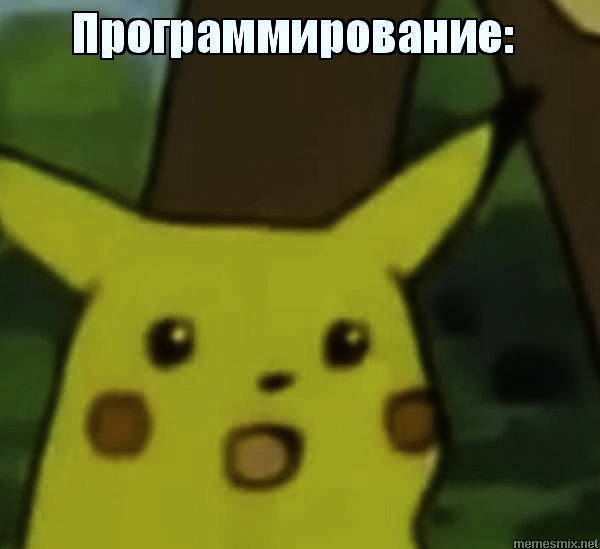

In [31]:
xyz_image = toXYZ_lib(srcImg,'rgb2xyz-lib.jpg')
xyz_image.save('rgb2xyz-lib.jpg')
xyz_image

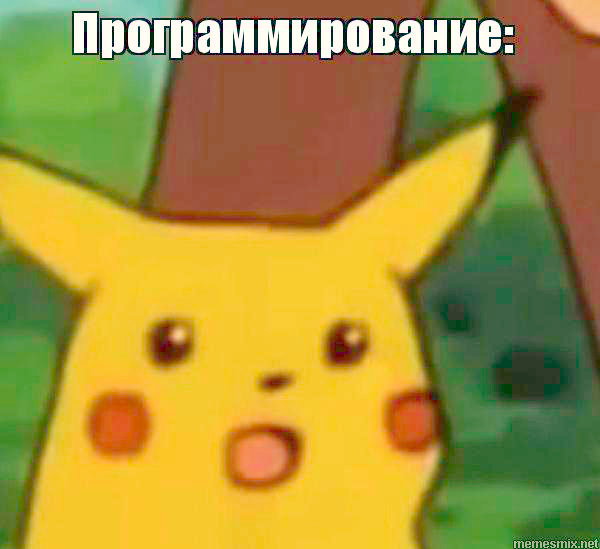

In [32]:
rgb_image_lib = toRGB_lib('rgb2xyz-lib.jpg','xyz2rgb-lib.jpg')
rgb_image_lib.save('xyz2rgb-lib.jpg')
rgb_image_lib

---

In [45]:
def rgb2xyz(RGB):
    var_R = (RGB[0] / 255)
    var_G = (RGB[1] / 255)
    var_B = (RGB[2] / 255)
    
    if var_R > 0.04045:
        var_R = ((var_R + 0.055) / 1.055) ** 2.4
    else:
        var_R = var_R / 12.92
    if var_G > 0.04045:
        var_G = ((var_G + 0.055) / 1.055) ** 2.4
    else:
        var_G = var_G / 12.92
    if var_B > 0.04045:
        var_B = ((var_B + 0.055) / 1.055) ** 2.4
    else:
        var_B = var_B / 12.92
    
    rgbM = np.array([var_R, var_G, var_B])
    
    xyzM = np.array([
        [0.4124, 0.3576, 0.1805],
        [0.2126, 0.7152, 0.0722],
        [0.0193, 0.1192, 0.9505]
    ])
    
    X,Y,Z = xyzM.dot(rgbM)
    
    X = int(X*255)
    Y = int(Y*255)
    Z = int(Z*255)
    
    if X > 255:
        X = 255
    
    if Y > 255:
        Y = 255
        
    if Z > 255:
        Z = 255    
    
    return X,Y,Z 

def xyz2rgb(XYZ):
    var_X = (XYZ[0] / 255)
    var_Y = (XYZ[1] / 255)
    var_Z = (XYZ[2] / 255)
    
    xyzM = np.array([var_X, var_Y, var_Z])
    
    rgbM = np.array([
        [3.240479, -1.53715, -0.498535],
        [-0.969256, 1.875991, 0.041556],
        [0.055648, -0.204043, 1.057311]
    ])
    
    R,G,B = rgbM.dot(xyzM)
    
    if R <= 0.0031308:
        R = 12.92*R
    else:
        R = 1.055*(R**(1/2.4)) - 0.055
        
    if G <= 0.0031308:
        G = 12.92*G
    else:
        G = 1.055*(G**(1/2.4)) - 0.055 
        
    if B <= 0.0031308:
        B = 12.92*B
    else:
        B = 1.055*(B**(1/2.4)) - 0.055     
    
    R = int(R*255)
    G = int(G*255)
    B = int(B*255)
    
    if R > 255:
        R = 255
    
    if G > 255:
        G = 255
        
    if B > 255:
        B = 255    
    
    return R,G,B

        
def toXYZ(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            
            RGB = np.array([r, g, b])
            XYZ = rgb2xyz(RGB)
            draw.point((i, j), (int(XYZ[0]), int(XYZ[1]), int(XYZ[2])))
            
    return new_img

def toRGB(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            x = pix1[i, j][0]
            y = pix1[i, j][1]
            z = pix1[i, j][2]
            
            XYZ = np.array([x, y, z])
            RGB = xyz2rgb(XYZ)

            draw.point((i, j), (int(RGB[0]), int(RGB[1]), int(RGB[2])))
            
    return new_img

### Самописные функции

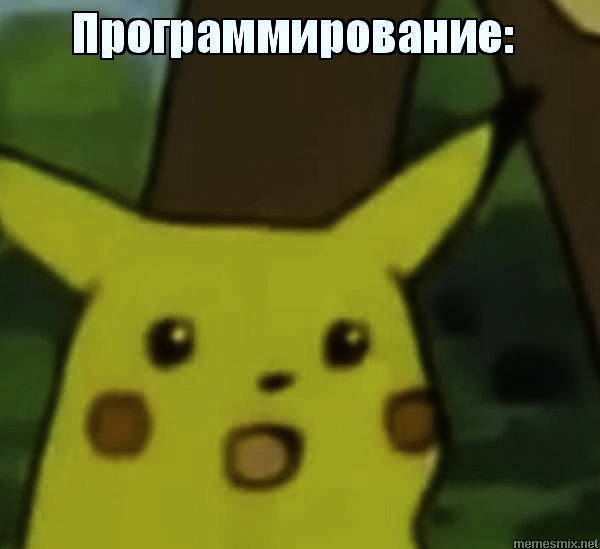

In [46]:
xyz_image = toXYZ(srcImg,'rgb2xyz.jpg')
xyz_image.save('rgb2xyz.jpg')
xyz_image

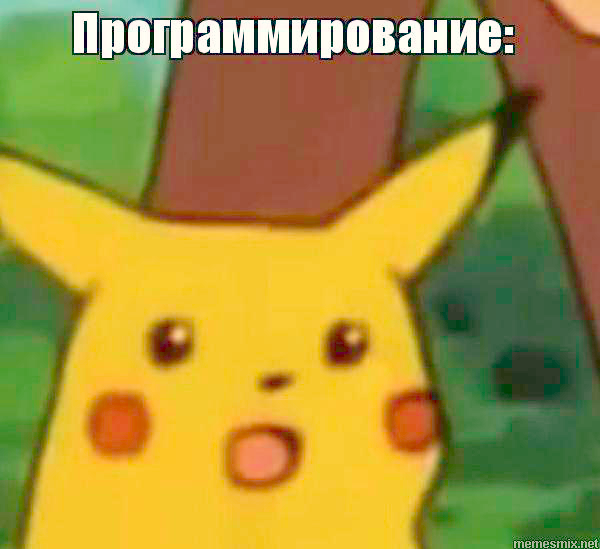

In [47]:
rgb_image = toRGB('rgb2xyz.jpg','xyz2rgb.jpg')
rgb_image.save('xyz2rgb.jpg')
rgb_image

#### Разница между библиотечным и самописным вариантом RGB2XYZ

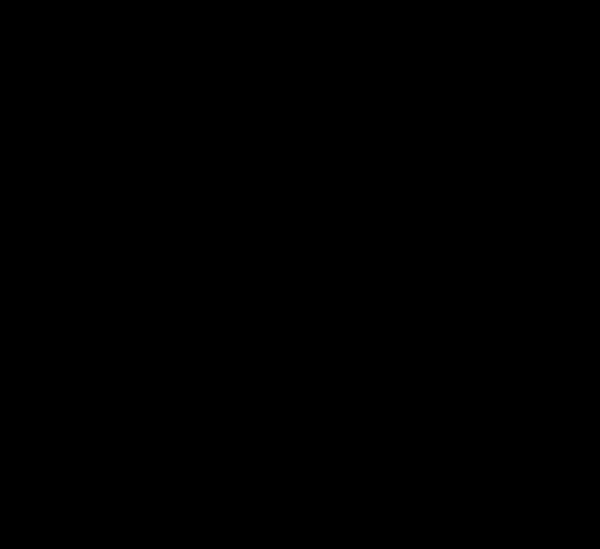

In [49]:
xyz = Image.open('rgb2xyz.jpg')
xyz_lib = Image.open('rgb2xyz-lib.jpg')
xyz_diff = calc_diff(xyz, xyz_lib)
xyz_diff.save('xyz-diff.jpg')
xyz_diff

#### Разница между библиотечным и самописным вариантом XYZ2RGB

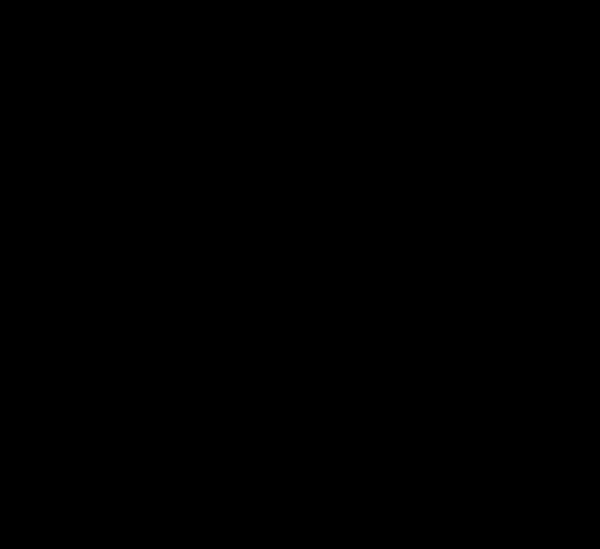

In [50]:
rgb = Image.open('xyz2rgb.jpg')
rgb_lib = Image.open('xyz2rgb.jpg')
rgb_diff = calc_diff(rgb, rgb_lib)
rgb_diff.save('xyz2rgb-diff.jpg')
rgb_diff

### Построить проекцию цветов исходного изображения на цветовой локус (плоскость xy).

In [52]:
def getColors(imageName):
    lists = deque()
    image = Image.open(imageName)
    pix1 = image.load() 

    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            r = r/255
            g = g/255
            b = b/255
            lists.append([r,g,b])
            
    return np.array(lists)

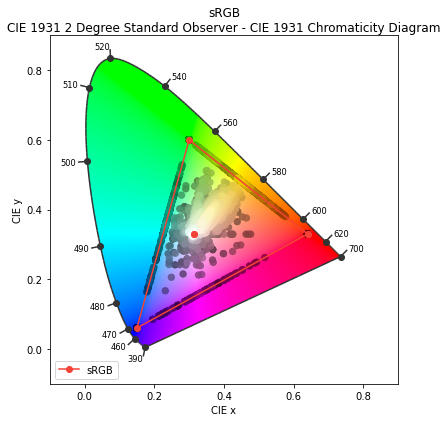

(<Figure size 432x432 with 1 Axes>,
 <AxesSubplot:title={'center':'sRGB\nCIE 1931 2 Degree Standard Observer - CIE 1931 Chromaticity Diagram'}, xlabel='CIE x', ylabel='CIE y'>)

In [53]:
arr = getColors(srcImg)
RGB = colour.models.eotf_inverse_sRGB(arr)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(RGB)

### Написать функцию перевода цветов из линейного RGB в HSV и обратно. Найти подходящую библиотечную функцию. Сравнить результаты через построение разностного изоборажения.

#### HSV функция Библиотечный вариант

In [55]:
def toHSV_lib(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]/255
            g = pix1[i, j][1]/255
            b = pix1[i, j][2]/255
            HSV = colorsys.rgb_to_hsv(r,g,b)

            draw.point((i, j), (int(255*HSV[0]), int(255*HSV[1]), int(255*HSV[2])))
            
    return new_img

def toRgbFromHsv_lib(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            h = pix1[i, j][0]/255
            s = pix1[i, j][1]/255
            v = pix1[i, j][2]/255
            RGB = colorsys.hsv_to_rgb(h,s,v)

            draw.point((i, j), (int(255*RGB[0]), int(255*RGB[1]), int(255*RGB[2])))
            
    return new_img

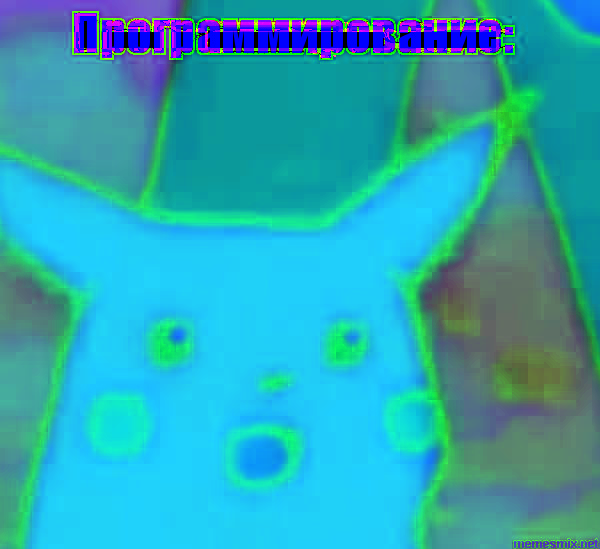

In [56]:
hsv_image_lib = toHSV_lib(srcImg,'rgb2hsv-lib.jpg')
hsv_image_lib.save('rgb2hsv-lib.jpg')
hsv_image_lib

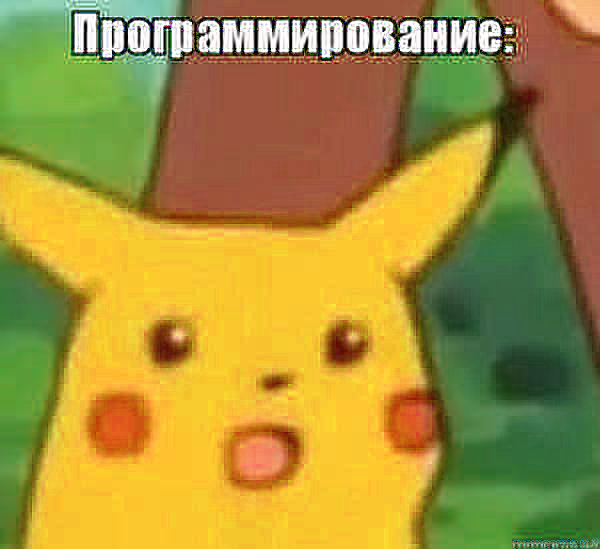

In [57]:
rgb_from_hsv_image_lib = toRgbFromHsv_lib('rgb2hsv-lib.jpg','hsv2rgb-lib.jpg')
rgb_from_hsv_image_lib.save('hsv2rgb-lib.jpg')
rgb_from_hsv_image_lib

#### HSV функция самописный вариант

In [59]:
def rgb2hsv(R,G,B):
    arr = np.array([R,G,B])
    
    MAX = np.amax(arr)
    MIN = np.amin(arr)
    
    DIFF = MAX - MIN 
    
    H = 0
    S = 0
    V = 0
    
    if DIFF == 0:
        H = 0
    
    elif R == MAX and G >= B:
        H = 60 * ((G-B)/(DIFF)) + 0
    
    elif R == MAX and G < B:
        H = 60 * ((G-B)/(DIFF)) + 360
        
    elif MAX == G:
        H = 60 * ((B-R)/(DIFF)) + 120   
        
    elif MAX == B:
        H = 60 * ((R-G)/(DIFF)) + 240   
        
    if MAX == 0:
        S = 0
    else:
        S = 1 - (MIN/MAX)
        
    V = MAX
    
    return H/360, S, V

def hsv2rgb(h, s, v):
    if s == 0.0:
        return v, v, v
    i = int(h*6.0)
    f = (h*6.0) - i
    p = v*(1.0 - s)
    q = v*(1.0 - s*f)
    t = v*(1.0 - s*(1.0-f))
    i = i%6
    if i == 0:
        return v, t, p
    if i == 1:
        return q, v, p
    if i == 2:
        return p, v, t
    if i == 3:
        return p, q, v
    if i == 4:
        return t, p, v
    if i == 5:
        return v, p, q


def toHSV(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            r = r/255
            g = g/255
            b = b/255
            HSV = rgb2hsv(r,g,b)
            draw.point((i, j), (int(HSV[0]*255), int(255*HSV[1]), int(255*HSV[2])))
            
    return new_img

def toRgbFromHsv(imageName, outName):
    image = Image.open(imageName)
    new_img = Image.new('RGB', ( image.width, image.height )) 
    pix1 = image.load()
    draw = ImageDraw.Draw(new_img) 

    for i in range(image.width):
        for j in range(image.height):
            r = pix1[i, j][0]
            g = pix1[i, j][1]
            b = pix1[i, j][2]
            r = r/255
            g = g/255
            b = b/255
            HSV = hsv2rgb(r,g,b)
            draw.point((i, j), (int(HSV[0]*255), int(255*HSV[1]), int(255*HSV[2])))
            
    return new_img

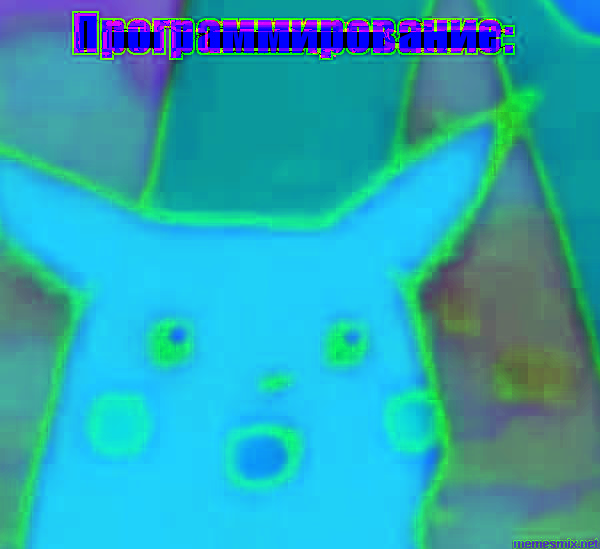

In [60]:
hsv_image = toHSV(srcImg,'rgb2hsv.jpg')
hsv_image.save('rgb2hsv.jpg')
hsv_image

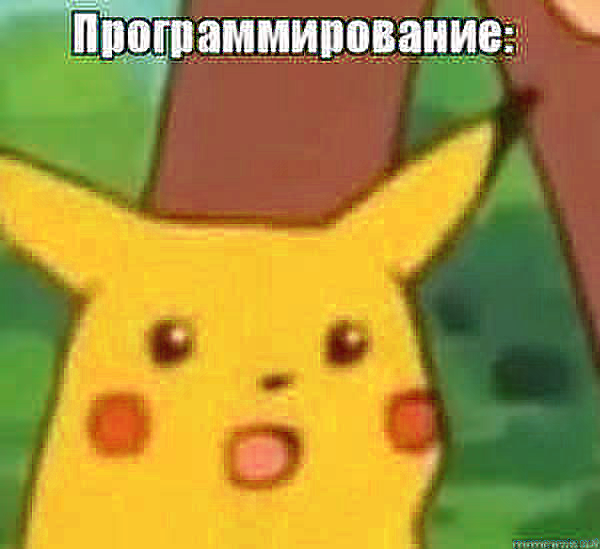

In [61]:
rgb_from_hsv_image = toRgbFromHsv('rgb2hsv.jpg','hsv2rgb.jpg')
rgb_from_hsv_image.save('hsv2rgb.jpg')
rgb_from_hsv_image

#### Разница междурезультатом работы библиотечной и своей функции RGB → HSV

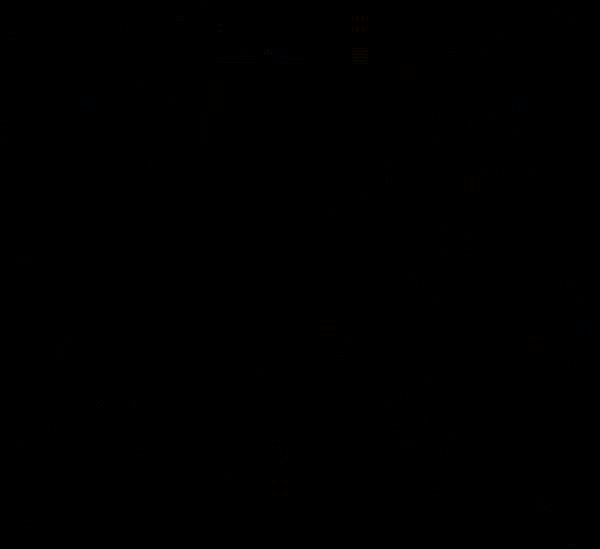

In [63]:
hsv = Image.open('rgb2hsv.jpg')
hsv_lib = Image.open('rgb2hsv-lib.jpg')
hsv_diff = calc_diff(hsv, hsv_lib)
hsv_diff.save('rgb2hsv-diff.jpg')
hsv_diff

#### Разница междурезультатом работы библиотечной и своей функции HSV → RGB

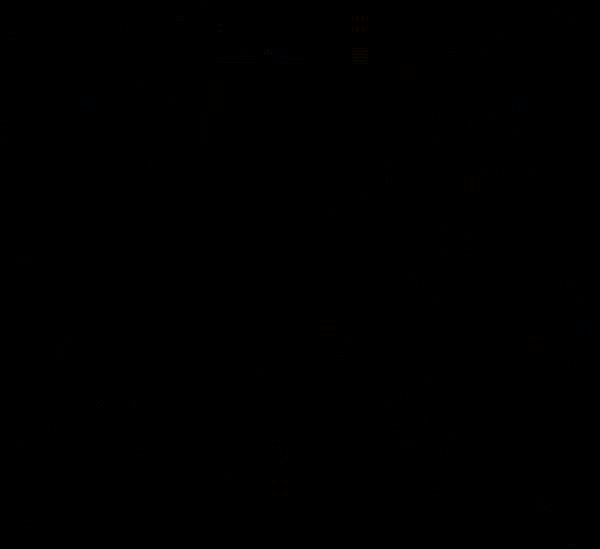

In [65]:
hsv_rgb = Image.open('hsv2rgb.jpg')
hsv_rgb_lib = Image.open('hsv2rgb-lib.jpg')
hsv_rgb_diff = calc_diff(hsv, hsv_lib)
hsv_rgb_diff.save('hsv2rgb-diff.jpg')
hsv_rgb_diff

### Используя библиотечные функции цветовой разности сравнить результаты для каждой функции.

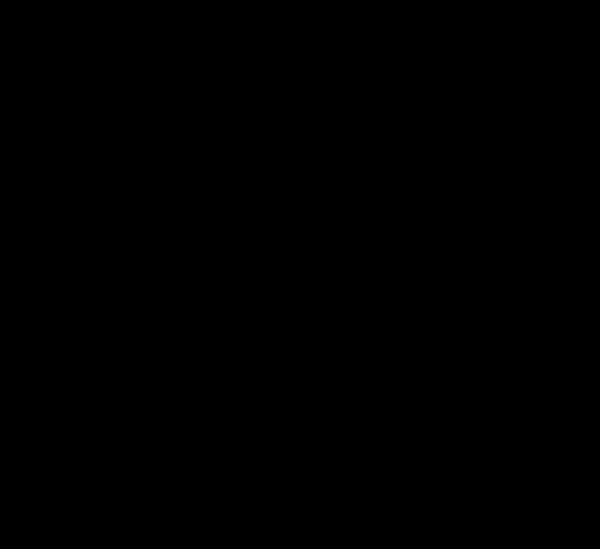

In [66]:
image1 = cv2.imread("rgb2xyz.jpg", 0)
image2 = cv2.imread("rgb2xyz-lib.jpg", 0)

diff = cv2.absdiff(image1, image2)
cv2.imwrite('rgb2xyz-diff-lib.jpg', diff)

xyz_diff_lib = Image.open('rgb2xyz-diff-lib.jpg')
xyz_diff_lib

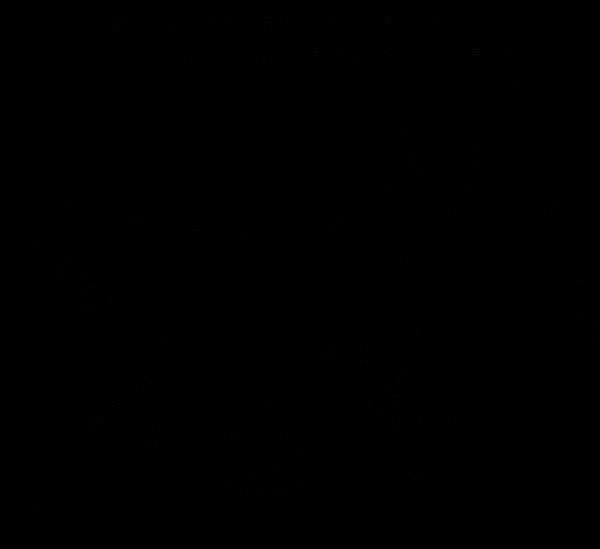

In [67]:
image1 = cv2.imread("xyz2rgb.jpg", 0)
image2 = cv2.imread("xyz2rgb-lib.jpg", 0)

diff = cv2.absdiff(image1, image2)
cv2.imwrite('xyz2rgb-diff-lib.jpg', diff)

xyz_rgb_diff_lib = Image.open('xyz2rgb-diff-lib.jpg')
xyz_rgb_diff_lib

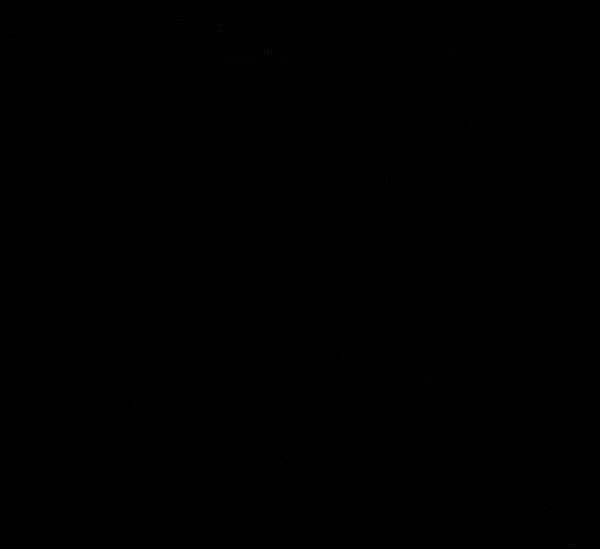

In [68]:
image1 = cv2.imread("rgb2hsv.jpg", 0)
image2 = cv2.imread("rgb2hsv-lib.jpg", 0)

diff = cv2.absdiff(image1, image2)
cv2.imwrite('rgb2hsv-diff-lib.jpg', diff)

hsv_diff_lib = Image.open('rgb2hsv-diff-lib.jpg')
hsv_diff_lib

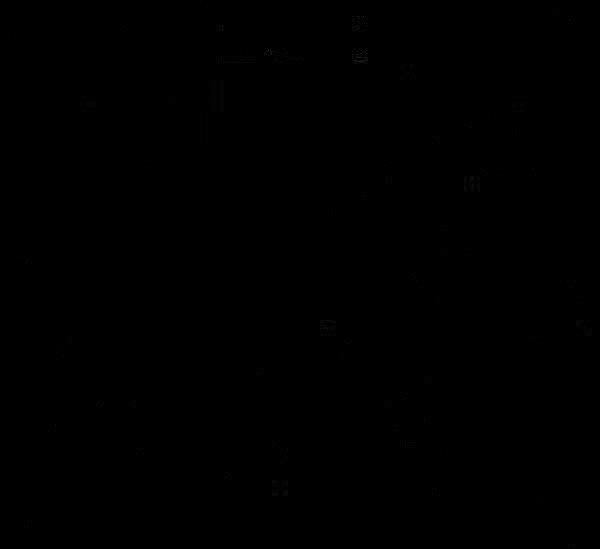

In [69]:
image1 = cv2.imread("hsv2rgb.jpg", 0)
image2 = cv2.imread("hsv2rgb-lib.jpg", 0)

diff = cv2.absdiff(image1, image2)
cv2.imwrite('hsv2rgb-diff-lib.jpg', diff)

hsv_rgb_diff_lib = Image.open('hsv2rgb-diff-lib.jpg')
hsv_rgb_diff_lib